In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import random

In [11]:
df_itr = pd.read_csv('datasets/Clean_Pandemic_Taxi_Data.csv', chunksize=10000, index_col=0)
df_itr

In [13]:
for df in df_itr:
    break
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Bronx_PU,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO
10034,2.0,2020-01-19 19:10:56,2020-01-19 19:15:13,2.0,0.76,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10035,2.0,2020-01-19 19:46:55,2020-01-19 19:49:15,2.0,0.84,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10036,2.0,2020-01-19 19:12:38,2020-01-19 19:17:28,1.0,0.85,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10037,2.0,2020-01-19 19:12:50,2020-01-19 19:16:44,1.0,1.00,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
10038,2.0,2020-01-19 19:49:20,2020-01-19 19:51:25,1.0,0.63,1.0,N,238,239,1.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180,2.0,2020-01-08 17:02:00,2020-01-08 17:06:57,1.0,0.80,1.0,N,239,239,1.0,...,0,0,1,0,0,0,0,1,0,0
20181,2.0,2020-01-08 17:26:12,2020-01-08 17:28:54,2.0,0.42,1.0,N,239,239,1.0,...,0,0,1,0,0,0,0,1,0,0
20182,2.0,2020-01-08 17:41:45,2020-01-08 17:57:40,1.0,2.13,1.0,N,239,239,1.0,...,0,0,1,0,0,0,0,1,0,0
20183,2.0,2020-01-08 17:11:05,2020-01-08 17:16:30,6.0,0.82,1.0,N,239,239,1.0,...,0,0,1,0,0,0,0,1,0,0


In [23]:
x_name = 'trip_distance'
y_name = 'total_amount'

In [14]:
x_trip_distance = df[x_name]
x_trip_distance

10034    0.76
10035    0.84
10036    0.85
10037    1.00
10038    0.63
         ... 
20180    0.80
20181    0.42
20182    2.13
20183    0.82
20184    0.57
Name: trip_distance, Length: 10000, dtype: float64

In [15]:
y_total_amount = df[y_name]
y_total_amount

10034    10.79
10035     8.58
10036    11.00
10037    11.80
10038     8.76
         ...  
20180    10.30
20181    11.30
20182    16.80
20183    13.80
20184     8.80
Name: total_amount, Length: 10000, dtype: float64

Text(0, 0.5, 'total_amount')

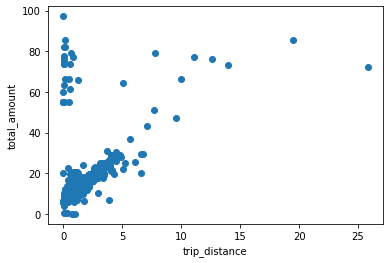

In [18]:
plt.scatter(x_trip_distance, y_total_amount)
plt.xlabel(x_name)
plt.ylabel(y_name)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(x_trip_distance), y_total_amount)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
residual = y_test - y_pred
residual

20104   -0.049139
12460    0.064237
10052   -1.979233
17452   -0.635921
17064    0.269757
           ...   
13502    0.536667
11650    0.177076
13018    0.064237
18304   -0.292451
18067   -0.016078
Name: total_amount, Length: 2500, dtype: float64

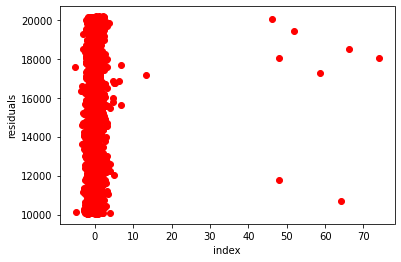

In [32]:
plt.scatter(residual, residual.index, color='red')
plt.xlabel('index')
plt.ylabel('residuals')
plt.show()

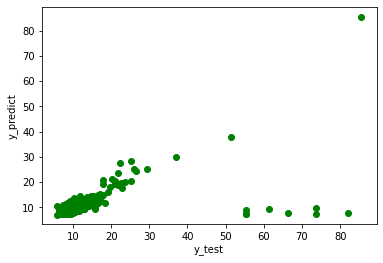

In [33]:
# A scatter plot of y_test vs. y_pred
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()